**Zomato Analysis and  visualization**

In [100]:
# Import Libraries

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
# Importing the Dataset.
data = pd.read_excel('resturant.xlsx')

In [102]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


**Data Cleaning**

In [6]:
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [7]:
data.drop(['url','address','phone','reviews_list','menu_item','listed_in(city)'],inplace=True,axis=1)

In [8]:
len(data.columns)

11

In [9]:
data.shape

(51717, 11)

In [10]:
data.duplicated().sum()

16608

In [11]:
after_dropping_duplicate = data.drop_duplicates()

In [12]:
after_dropping_duplicate

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet
...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Whitefield,Bar,NaN,Continental,1500.0,Pubs and bars
51713,Vinod Bar And Restaurant,No,No,NaN,0,Whitefield,Bar,NaN,Finger Food,600.0,Pubs and bars
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,Whitefield,Bar,NaN,Finger Food,2000.0,Pubs and bars
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,2500.0,Pubs and bars


In [13]:
after_dropping_duplicate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35109 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         35109 non-null  object 
 1   online_order                 35109 non-null  object 
 2   book_table                   35109 non-null  object 
 3   rate                         31339 non-null  object 
 4   votes                        35109 non-null  int64  
 5   location                     35095 non-null  object 
 6   rest_type                    34953 non-null  object 
 7   dish_liked                   18102 non-null  object 
 8   cuisines                     35076 non-null  object 
 9   approx_cost(for two people)  34888 non-null  float64
 10  listed_in(type)              35109 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 3.2+ MB


In [14]:
after_dropping_duplicate['name'][:20]

0                                                 Jalsa
1                                        Spice Elephant
2                                       San Churro Cafe
3                                 Addhuri Udupi Bhojana
4                                         Grand Village
5                                       Timepass Dinner
6       Rosewood International Hotel - Bar & Restaurant
7                                                Onesta
8                                        Penthouse Cafe
9                                             Smacznego
10    CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The A...
11                                         Cafe Shuffle
12                                     The Coffee Shack
13                                           Caf-Eleven
14                                      San Churro Cafe
15                                        Cafe Vivacity
16                                         Catch-up-ino
17                                     Kirthi's 

In [15]:
after_dropping_duplicate['name'].iloc[10]

'CafÃ\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â© Down The Alley'

In [16]:
after_dropping_duplicate['name'].iloc[1750:1800]

1751                                               Arzak
1752                            Furry Fairy Paw Paradise
1753                                               Petoo
1754                                         Night Panda
1755                                         Spicy Grill
1756    E2 - EntrÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ©e Envoy
1757                                       Aha Juice Bar
1758                         Cafe Club Kerala Restaurant
1759                                      Cake N Cookies
1760                                      Bright Go Nuts
1761                                     Hotel Namadhari
1762                                  Nammuru Nati Hotel
1763                                          3ice Cubes
1764                                    Tasty Restaurant
1765                                        Hotel Ambara
1766                                       Biryani Treat
1767                                        Best Biryani
1768                           

In [17]:
isinstance("12",int)

False

In [18]:
def clean_rest_name(name):
    if isinstance(name,str):
        if re.findall(r'[a-zA-Z0-9 ]',name):
            list_name = re.findall(r'[a-zA-Z0-9 ]',name)   #list
        string_name = "".join(list_name)
        return string_name
    else:
        return name

In [19]:
after_dropping_duplicate['name'] = after_dropping_duplicate['name'].apply(clean_rest_name)

C:\Users\Neha Koli\AppData\Local\Temp\ipykernel_5796\3460974324.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after_dropping_duplicate['name'] = after_dropping_duplicate['name'].apply(clean_rest_name)


In [20]:
after_dropping_duplicate['name'][1750:1800]

1751                          Arzak
1752       Furry Fairy Paw Paradise
1753                          Petoo
1754                    Night Panda
1755                    Spicy Grill
1756                E2  Entre Envoy
1757                  Aha Juice Bar
1758    Cafe Club Kerala Restaurant
1759                 Cake N Cookies
1760                 Bright Go Nuts
1761                Hotel Namadhari
1762             Nammuru Nati Hotel
1763                     3ice Cubes
1764               Tasty Restaurant
1765                   Hotel Ambara
1766                  Biryani Treat
1767                   Best Biryani
1768                         Innate
1769                  Tandoori Spot
1770                   Night Hunger
1771         Santhrupthi Halli Mane
1772                Iyengars Bakery
1773                      Nutri Fit
1774                New Kabab Plaza
1775               Padosi Apke Apne
1776                Grill On Wheels
1777                 Charcoal Flame
1778                   Chick

In [21]:
after_dropping_duplicate.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet


In [22]:
after_dropping_duplicate['online_order'].value_counts()

online_order
Yes    20886
No     14223
Name: count, dtype: int64

**Around 20K resutrants in Bangalore provides online order service**

In [23]:
after_dropping_duplicate['book_table'].value_counts()

book_table
No     29675
Yes     5434
Name: count, dtype: int64

In [24]:
after_dropping_duplicate['rate']

0         4.1/5
1         4.1/5
2         3.8/5
3         3.7/5
4         3.8/5
          ...  
51712    3.6 /5
51713       NaN
51714       NaN
51715    4.3 /5
51716    3.4 /5
Name: rate, Length: 35109, dtype: object

In [25]:
after_dropping_duplicate['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [26]:
float('4.1/5'.split('/')[0])

4.1

In [27]:
def clean_rate(rates):
    if rates == "-" or rates == "NEW":
        return np.nan
    else:
        rates_converted = float(str(rates).split('/')[0])
        return rates_converted

In [28]:
after_dropping_duplicate['rate']=after_dropping_duplicate['rate'].apply(clean_rate)

C:\Users\Neha Koli\AppData\Local\Temp\ipykernel_5796\2126498299.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after_dropping_duplicate['rate']=after_dropping_duplicate['rate'].apply(clean_rate)


In [29]:
after_dropping_duplicate['rate']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: rate, Length: 35109, dtype: float64

In [30]:
after_dropping_duplicate['rate']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: rate, Length: 35109, dtype: float64

In [31]:
after_dropping_duplicate

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet
...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews Four Points by Sheraton Bengaluru,No,No,3.6,27,Whitefield,Bar,NaN,Continental,1500.0,Pubs and bars
51713,Vinod Bar And Restaurant,No,No,NaN,0,Whitefield,Bar,NaN,Finger Food,600.0,Pubs and bars
51714,Plunge Sheraton Grand Bengaluru Whitefield Ho...,No,No,NaN,0,Whitefield,Bar,NaN,Finger Food,2000.0,Pubs and bars
51715,Chime Sheraton Grand Bengaluru Whitefield Hotel,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,2500.0,Pubs and bars


In [32]:
after_dropping_duplicate['rate'].mean()

3.731078872769718

In [33]:
after_dropping_duplicate['rate'].fillna(after_dropping_duplicate['rate'].mean(),inplace=True)

C:\Users\Neha Koli\AppData\Local\Temp\ipykernel_5796\2721523553.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after_dropping_duplicate['rate'].fillna(after_dropping_duplicate['rate'].mean(),inplace=True)


In [34]:
after_dropping_duplicate

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.100000,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.100000,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.800000,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.700000,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.800000,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet
...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews Four Points by Sheraton Bengaluru,No,No,3.600000,27,Whitefield,Bar,NaN,Continental,1500.0,Pubs and bars
51713,Vinod Bar And Restaurant,No,No,3.731079,0,Whitefield,Bar,NaN,Finger Food,600.0,Pubs and bars
51714,Plunge Sheraton Grand Bengaluru Whitefield Ho...,No,No,3.731079,0,Whitefield,Bar,NaN,Finger Food,2000.0,Pubs and bars
51715,Chime Sheraton Grand Bengaluru Whitefield Hotel,No,Yes,4.300000,236,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,2500.0,Pubs and bars


In [35]:
after_dropping_duplicate['rate'] = round(after_dropping_duplicate['rate'],1)

C:\Users\Neha Koli\AppData\Local\Temp\ipykernel_5796\584393281.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after_dropping_duplicate['rate'] = round(after_dropping_duplicate['rate'],1)


In [36]:
after_dropping_duplicate

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet
...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews Four Points by Sheraton Bengaluru,No,No,3.6,27,Whitefield,Bar,NaN,Continental,1500.0,Pubs and bars
51713,Vinod Bar And Restaurant,No,No,3.7,0,Whitefield,Bar,NaN,Finger Food,600.0,Pubs and bars
51714,Plunge Sheraton Grand Bengaluru Whitefield Ho...,No,No,3.7,0,Whitefield,Bar,NaN,Finger Food,2000.0,Pubs and bars
51715,Chime Sheraton Grand Bengaluru Whitefield Hotel,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,2500.0,Pubs and bars


In [37]:
after_dropping_duplicate['votes'].value_counts()

votes
0       5099
4        764
6        632
7        551
9        469
        ... 
2569       1
575        1
7227       1
1290       1
843        1
Name: count, Length: 2328, dtype: int64

In [38]:
after_dropping_duplicate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35109 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         35109 non-null  object 
 1   online_order                 35109 non-null  object 
 2   book_table                   35109 non-null  object 
 3   rate                         35109 non-null  float64
 4   votes                        35109 non-null  int64  
 5   location                     35095 non-null  object 
 6   rest_type                    34953 non-null  object 
 7   dish_liked                   18102 non-null  object 
 8   cuisines                     35076 non-null  object 
 9   approx_cost(for two people)  34888 non-null  float64
 10  listed_in(type)              35109 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 3.2+ MB


In [39]:
after_dropping_duplicate['location'].value_counts()

location
BTM                     2520
Whitefield              1972
Indiranagar             1792
HSR                     1774
Marathahalli            1683
                        ... 
Central Bangalore          5
Nagarbhavi                 4
Rajarajeshwari Nagar       2
Jakkur                     1
Peenya                     1
Name: count, Length: 93, dtype: int64

In [40]:
after_dropping_duplicate['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', nan, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan 

In [41]:
after_dropping_duplicate['location'].fillna("No Info",inplace=True)

C:\Users\Neha Koli\AppData\Local\Temp\ipykernel_5796\746503968.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after_dropping_duplicate['location'].fillna("No Info",inplace=True)


In [42]:
after_dropping_duplicate['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', 'No Info', 'CV Raman Nagar', 'Electronic City',
       'HSR', 'Marathahalli', 'Sarjapur Road', 'Wilson Garden',
       'Shanti Nagar', 'Koramangala 5th Block', 'Koramangala 8th Block',
       'Richmond Road', 'Koramangala 7th Block', 'Jalahalli',
       'Koramangala 4th Block', 'Bellandur', 'Whitefield',
       'East Bangalore', 'Old Airport Road', 'Indiranagar',
       'Koramangala 1st Block', 'Frazer Town', 'RT Nagar', 'MG Road',
       'Brigade Road', 'Lavelle Road', 'Church Street', 'Ulsoor',
       'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipu

In [43]:
after_dropping_duplicate['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', nan, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Pub, Bar', 'Casual Dining, Pub',
      

In [44]:
after_dropping_duplicate['rest_type'].fillna("No Info",inplace=True)

C:\Users\Neha Koli\AppData\Local\Temp\ipykernel_5796\2268525272.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after_dropping_duplicate['rest_type'].fillna("No Info",inplace=True)


In [45]:
after_dropping_duplicate['dish_liked'].unique()

array(['Pasta, Lunch Buffet, Masala Papad, Paneer Lajawab, Tomato Shorba, Dum Biryani, Sweet Corn Soup',
       'Momos, Lunch Buffet, Chocolate Nirvana, Thai Green Curry, Paneer Tikka, Dum Biryani, Chicken Biryani',
       'Churros, Cannelloni, Minestrone Soup, Hot Chocolate, Pink Sauce Pasta, Salsa, Veg Supreme Pizza',
       ...,
       'Noodles, Chicken Noodle, Momos, American Chopsuey, Salad, Manchow Soup, Manchurian',
       'Chicken Quesadilla, Naan, Breakfast Buffet, Cheesecake, Cocktails, Lunch Buffet, Biryani',
       'Biryani, Andhra Meal'], dtype=object)

In [46]:
for item in after_dropping_duplicate['dish_liked'].unique():
    print(item)

Pasta, Lunch Buffet, Masala Papad, Paneer Lajawab, Tomato Shorba, Dum Biryani, Sweet Corn Soup
Momos, Lunch Buffet, Chocolate Nirvana, Thai Green Curry, Paneer Tikka, Dum Biryani, Chicken Biryani
Churros, Cannelloni, Minestrone Soup, Hot Chocolate, Pink Sauce Pasta, Salsa, Veg Supreme Pizza
Masala Dosa
Panipuri, Gol Gappe
Onion Rings, Pasta, Kadhai Paneer, Salads, Salad, Roti, Jeera Rice
nan
Farmhouse Pizza, Chocolate Banana, Virgin Mojito, Pasta, Paneer Tikka, Lime Soda, Prawn Pizza
Pizza, Mocktails, Coffee, Nachos, Salad, Pasta, Sandwiches
Waffles, Pasta, Coleslaw Sandwich, Choco Waffle, Tacos, Momos, Cheese Nachos
Waffles, Pasta, Crispy Chicken, Honey Chilli Chicken, Sandwich, Coffee, Crepe
Mocktails, Peri Fries, Lasagne, Pizza, Chicken Bbq Wings, Virgin Mojito, Nachos
Coffee, Spaghetti, Pancakes, Nachos, Pasta, Sandwich, Garlic Bread
Sandwich, Omelette, Ice Tea, Virgin Mojito, Hot Chocolate, Pasta Arrabiata, Hazelnut Cappuccino
Garlic Bread, Burgers, Sandwiches, Pizza, Hot Chocolat

In [47]:
after_dropping_duplicate['dish_liked'].fillna("No Info",inplace=True)

C:\Users\Neha Koli\AppData\Local\Temp\ipykernel_5796\2204004784.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after_dropping_duplicate['dish_liked'].fillna("No Info",inplace=True)


In [48]:
# after_dropping_duplicate['dish_liked'].value_counts()
after_dropping_duplicate.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)',
       'listed_in(type)'],
      dtype='object')

In [49]:
after_dropping_duplicate['cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ...,
       'North Indian, Street Food, Biryani', 'Chinese, Mughlai',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

In [50]:
for item in after_dropping_duplicate['cuisines'].unique():
    print(item
         )

North Indian, Mughlai, Chinese
Chinese, North Indian, Thai
Cafe, Mexican, Italian
South Indian, North Indian
North Indian, Rajasthani
North Indian
North Indian, South Indian, Andhra, Chinese
Pizza, Cafe, Italian
Cafe, Italian, Continental
Cafe, Mexican, Italian, Momos, Beverages
Cafe
Cafe, Chinese, Continental, Italian
Cafe, Continental
Cafe, Fast Food, Continental, Chinese, Momos
Chinese, Cafe, Italian
Cafe, Italian, American
Cafe, French, North Indian
Cafe, Pizza, Fast Food, Beverages
Cafe, Fast Food
Italian, Fast Food, Cafe, European
Cafe, Bakery
Cafe, South Indian
Cafe, Fast Food, Beverages
North Indian, Cafe, Chinese, Fast Food
Cafe, Italian
North Indian, Fast Food, Chinese, Burger
Bakery, Desserts
Pizza
North Indian, Biryani, Fast Food
Biryani
North Indian, Chinese, Fast Food
Chinese, Thai, Momos
North Indian, Mughlai, South Indian, Chinese
South Indian
Street Food, Fast Food
Burger, Fast Food
Pizza, Fast Food
North Indian, Continental, Italian
North Indian, Chinese
North Indian,

In [51]:
after_dropping_duplicate['cuisines'].fillna("No Info",inplace=True)

C:\Users\Neha Koli\AppData\Local\Temp\ipykernel_5796\973295816.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after_dropping_duplicate['cuisines'].fillna("No Info",inplace=True)


In [52]:
after_dropping_duplicate['approx_cost(for two people)'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700.,   nan, 1400.,  180., 1350.,
       2200., 2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800.,
       3400.,   40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,
        469.,   70., 3200.,   60.,  560.,  240.,  360., 6000., 1050.,
       2300., 4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [53]:
after_dropping_duplicate_group = after_dropping_duplicate.fillna(after_dropping_duplicate.groupby('rest_type')['approx_cost(for two people)'].transform("mean"))

In [54]:
after_dropping_duplicate_group['approx_cost(for two people)'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700.,   nan, 1400.,  180., 1350.,
       2200., 2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800.,
       3400.,   40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,
        469.,   70., 3200.,   60.,  560.,  240.,  360., 6000., 1050.,
       2300., 4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [55]:
float(np.nan)

nan

In [56]:
after_dropping_duplicate['approx_cost(for two people)'] = after_dropping_duplicate['approx_cost(for two people)'].fillna(after_dropping_duplicate['approx_cost(for two people)'].mean())

C:\Users\Neha Koli\AppData\Local\Temp\ipykernel_5796\1868014258.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after_dropping_duplicate['approx_cost(for two people)'] = after_dropping_duplicate['approx_cost(for two people)'].fillna(after_dropping_duplicate['approx_cost(for two people)'].mean())


In [57]:
after_dropping_duplicate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35109 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         35109 non-null  object 
 1   online_order                 35109 non-null  object 
 2   book_table                   35109 non-null  object 
 3   rate                         35109 non-null  float64
 4   votes                        35109 non-null  int64  
 5   location                     35109 non-null  object 
 6   rest_type                    35109 non-null  object 
 7   dish_liked                   35109 non-null  object 
 8   cuisines                     35109 non-null  object 
 9   approx_cost(for two people)  35109 non-null  float64
 10  listed_in(type)              35109 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 3.2+ MB


**1.Top 10 Restrarunts with highest votes**

In [58]:
after_dropping_duplicate.groupby("name")[['votes']].mean().sort_values(by="votes",ascending=False).head(10).reset_index()

,name,votes
0,Byg Brewski Brewing Company,16588.500000
1,Toit,14956.000000
2,The Black Pearl,9562.333333
3,Big Pitcher,9164.500000
4,Arbor Brewing Company,8396.545455
5,Prost Brew Pub,7861.666667
6,Church Street Social,7561.727273
7,Hoot,7257.000000
8,Truffles,7139.952381
9,The Hole in the Wall Cafe,7124.875000


In [59]:
after_dropping_duplicate['rate'].unique

<bound method Series.unique of 0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    3.7
51714    3.7
51715    4.3
51716    3.4
Name: rate, Length: 35109, dtype: float64>

**2. Top 10 Restrarunts with highest rates**

In [60]:
after_dropping_duplicate.groupby("name")[['rate']].mean().sort_values(by="rate",ascending=False).head(10).reset_index()

,name,rate
0,Byg Brewski Brewing Company,4.900000
1,Asia Kitchen By Mainland China,4.900000
2,Sant Spa Cuisine,4.900000
3,Punjab Grill,4.871429
4,Belgian Waffle Factory,4.852381
5,OG Variar Sons,4.800000
6,Flechazo,4.800000
7,The Pizza Bakery,4.800000
8,CTR,4.750000
9,Barbecue by Punjab Grill,4.750000


**3. Low cost restrarunts**

In [61]:
lowest_cost=after_dropping_duplicate.groupby('name')[['approx_cost(for two people)']].min('approx_cost(for two people)').sort_values(by='approx_cost(for two people)',ascending=False).head(10)
lowest_cost

,approx_cost(for two people)
name,
Le Cirque Signature The Leela Palace,6000.0
Royal Afghan ITC Windsor,5000.0
Malties Radisson Blu,4500.0
La Brasserie Le Meridien,4100.0
Masala Klub The Taj West End,4000.0
Riwaz The RitzCarlton,4000.0
Dakshin ITC Windsor,4000.0
Dum Pukht Jolly Nabobs ITC Windsor,4000.0
Grill 99 The RitzCarlton,4000.0


**4. Top 10 High cost restrarunts**

In [62]:
highest_cost=after_dropping_duplicate.groupby('name')[['approx_cost(for two people)']].max('approx_cost(for two people)').sort_values(by='approx_cost(for two people)',ascending=True).head(10)
highest_cost

,approx_cost(for two people)
name,
Srinidhi Sagar Deluxe,40.0
Bread Better,50.0
Funky Food,60.0
Namaste,70.0
Nellore Dosa Camp,70.0
Dosa Cafe,80.0
Dtink Lab,80.0
Ishta Upahar,100.0
Boys Home,100.0


**5. cafes with highest Rate**

In [63]:
all_cafe_data = after_dropping_duplicate[after_dropping_duplicate['listed_in(type)'] == "Cafes"]

In [64]:
all_cafe_data.groupby("name")[['rate']].mean().sort_values(by="rate",ascending=False).head(10).reset_index()

,name,rate
0,Hammered,4.657143
1,Lot Like Crepes,4.633333
2,Here Now,4.600000
3,The Hole in the Wall Cafe,4.600000
4,The Blue Wagon Kitchen,4.600000
5,Truffles,4.600000
6,Bloomsburys Global Kitchen Bakehouse,4.500000
7,Market Table,4.500000
8,99 Pancakes,4.500000
9,Avista Cafe Pizzeria,4.500000


**6. highest votes restrarunts**

In [65]:
 all_cafe_data.groupby("name")[['votes']].mean().sort_values(by="votes",ascending=False).head(10).reset_index()

,name,votes
0,Truffles,7524.615385
1,The Hole in the Wall Cafe,7122.750000
2,Hammered,4488.142857
3,Onesta,4059.421053
4,Dyu Art Cafe,3841.000000
5,A Hole Lotta Love Cafe,2868.000000
6,Green Theory,2847.750000
7,Om Made Cafe,2732.600000
8,Mr Beans Home Cafe,2712.333333
9,Bundar,2449.000000


**7. Top 10 restrarunt filter with desserts with highest rate**

In [66]:
desserts=after_dropping_duplicate[after_dropping_duplicate['listed_in(type)']=='Desserts']
desserts=desserts.groupby('name')[['rate']].mean('rate').sort_values(by="rate",ascending=False).head(10)
desserts

,rate
name,
Belgian Waffle Factory,4.850000
OG Variar Sons,4.800000
The Pizza Bakery,4.800000
Truffles,4.700000
Flechazo,4.700000
Hammered,4.683333
Milano Ice Cream,4.633333
Kurtoskalacs,4.620000
Mugful Of Stories,4.600000


In [67]:
after_dropping_duplicate

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet
...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews Four Points by Sheraton Bengaluru,No,No,3.6,27,Whitefield,Bar,No Info,Continental,1500.0,Pubs and bars
51713,Vinod Bar And Restaurant,No,No,3.7,0,Whitefield,Bar,No Info,Finger Food,600.0,Pubs and bars
51714,Plunge Sheraton Grand Bengaluru Whitefield Ho...,No,No,3.7,0,Whitefield,Bar,No Info,Finger Food,2000.0,Pubs and bars
51715,Chime Sheraton Grand Bengaluru Whitefield Hotel,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,2500.0,Pubs and bars


**8. Visualizing Table booking on different locations**

In [68]:
after_dropping_duplicate['book_table'].unique()

array(['Yes', 'No'], dtype=object)

In [69]:
after_dropping_duplicate['book_table']=='Yes'

0         True
1        False
2        False
3        False
4        False
         ...  
51712    False
51713    False
51714    False
51715     True
51716    False
Name: book_table, Length: 35109, dtype: bool

In [70]:
after_dropping_duplicate['book_table']=='No'

0        False
1         True
2         True
3         True
4         True
         ...  
51712     True
51713     True
51714     True
51715    False
51716     True
Name: book_table, Length: 35109, dtype: bool

In [71]:
# Book Table Yes Or No
book_table = after_dropping_duplicate.groupby(['location','book_table'])['name'].count().head(20)
book_table.to_csv('location_booktable.csv')
book_table = pd.read_csv('location_booktable.csv')
book_table = pd.pivot_table(book_table, values=None, index=['location'], columns=['book_table'], fill_value=0, aggfunc=np.sum)
book_table

name     
book_table            No  Yes
location                     
BTM                 2393  127
Banashankari         530   44
Banaswadi            438    6
Bannerghatta Road    984   80
Basavanagudi         451   12
Basaveshwara Nagar   159   18
Bellandur           1041   97
Bommanahalli         178    3
Brigade Road         543  147
Brookefield          527   73

<Axes: xlabel='location'>

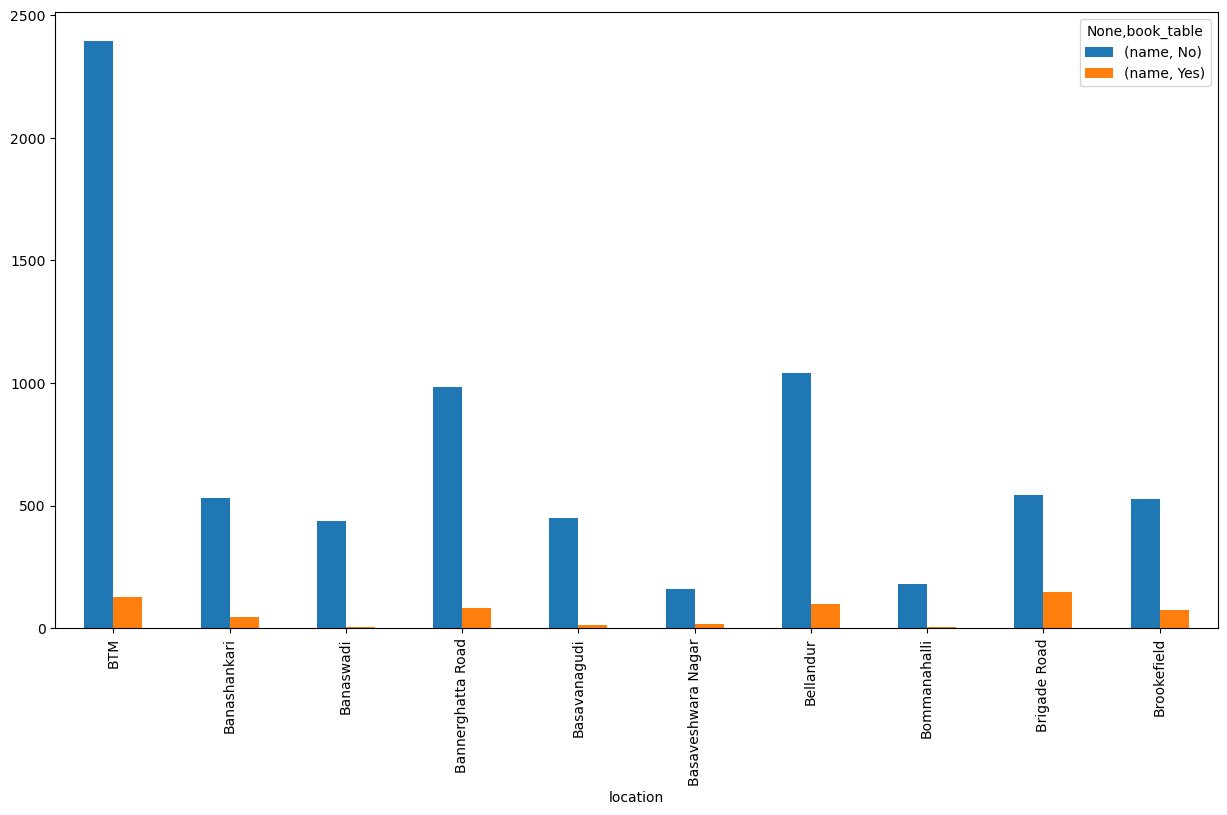

In [72]:
book_table.plot(kind = 'bar', figsize = (15,8))

**Most locations not accept table booking facility**

**9. Rating with table booking Vs Rating without table booking**

In [73]:
# Q. Rating with table booking Vs Rating without table booking
with_booking=after_dropping_duplicate[after_dropping_duplicate['book_table']=='Yes']['rate'].mean()
print('Rating with table booking =',with_booking)


without_booking=after_dropping_duplicate[after_dropping_duplicate['book_table']=='No']['rate'].mean()
print('Rating without table booking =',without_booking)


Rating with table booking = 4.1555576002944425
Rating without table booking = 3.6479831508003366


<Axes: >

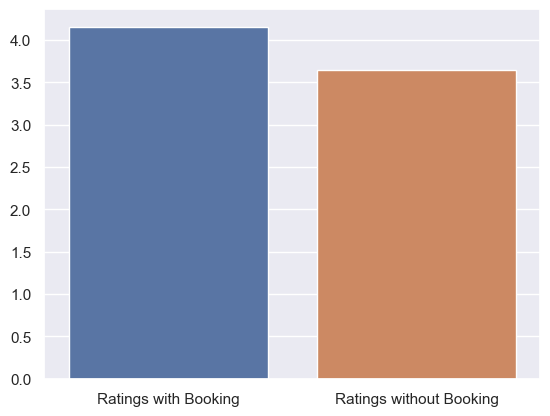

In [74]:
values = {'Ratings with Booking':[with_booking],'Ratings without Booking':[without_booking]}
values

data =pd.DataFrame.from_dict(values)
sns.set(style='darkgrid')
sns.barplot(data = data)


**10. Top 10 restrarunt types**

In [75]:
df_countries = pd.DataFrame(after_dropping_duplicate.rest_type.value_counts().reset_index().values, columns=["rest_type", "count"])
df_countries=df_countries
df_countries.head(10)

,rest_type,count
0,Quick Bites,12196
1,Casual Dining,7610
2,Cafe,2620
3,Delivery,1523
4,Dessert Parlor,1504
5,"Takeaway, Delivery",1228
6,"Casual Dining, Bar",962
7,Bakery,736
8,Beverage Shop,490
9,Bar,482


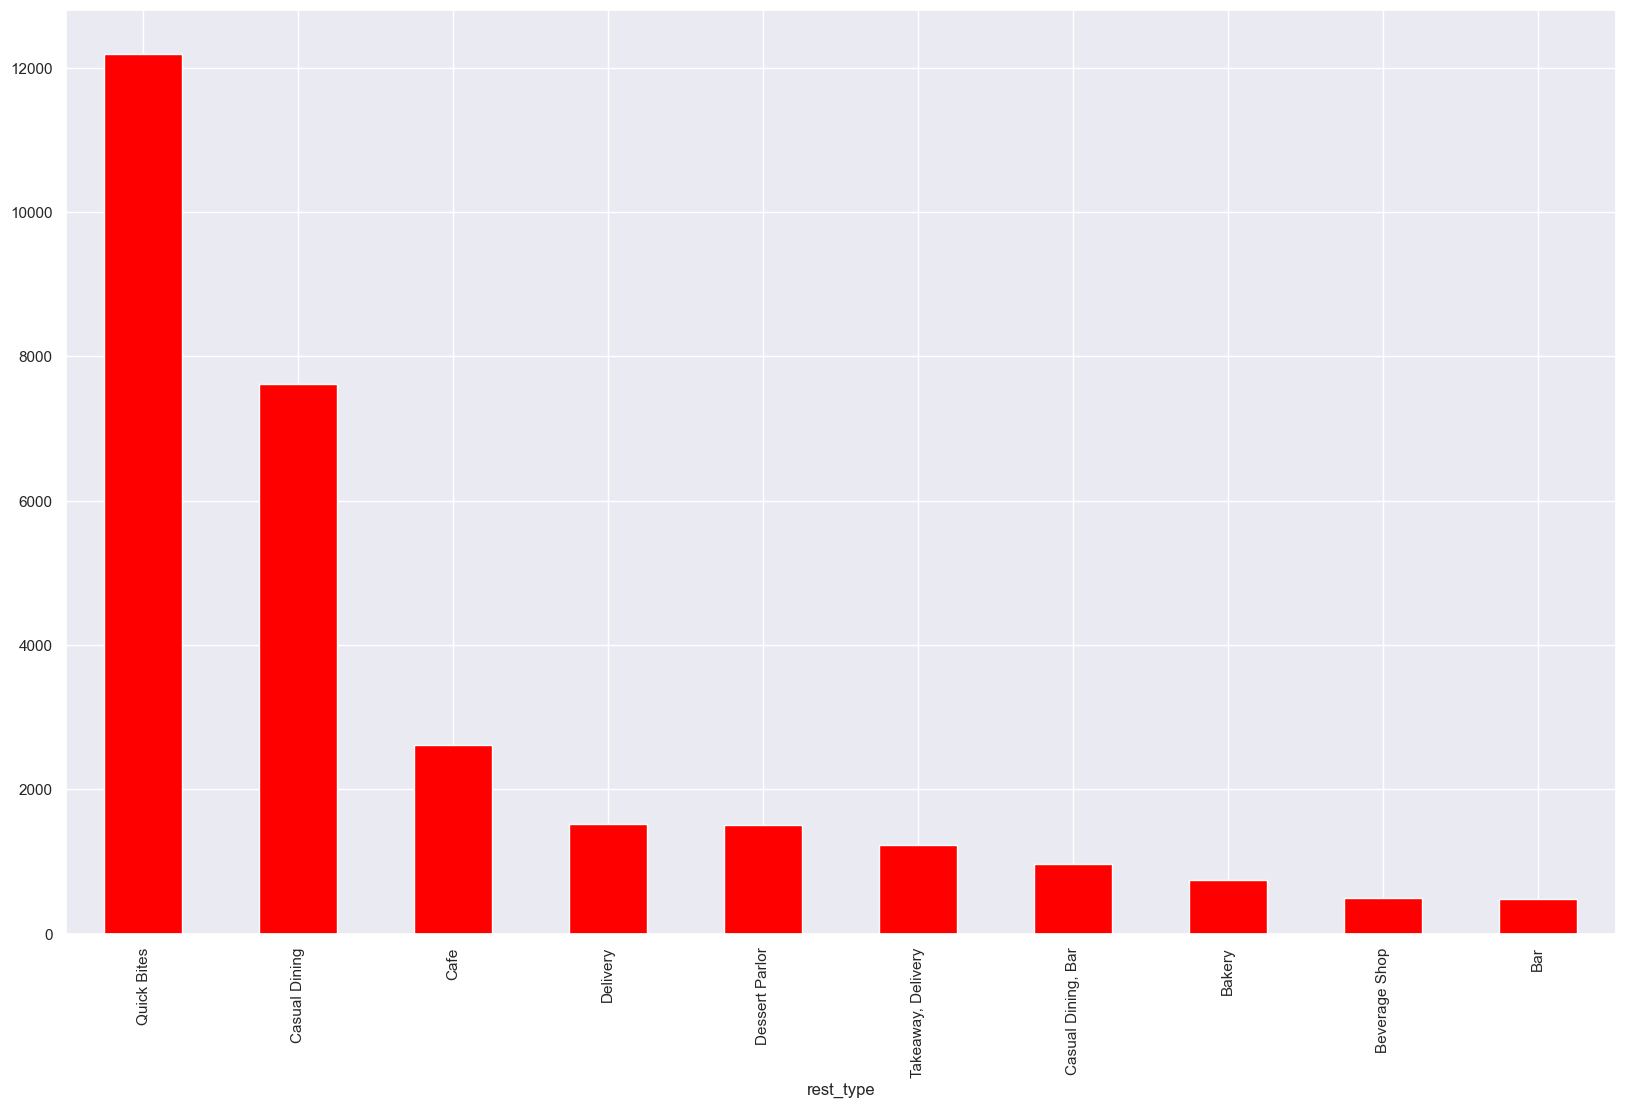

In [76]:
plt.figure(figsize=(20,12))
after_dropping_duplicate['rest_type'].value_counts()[:10].plot.bar(color='red')
plt.show()

In [ ]:
**11.Online Orders**

In [77]:
online_order_counts = after_dropping_duplicate['online_order'].value_counts()
online_order_counts

online_order
Yes    20886
No     14223
Name: count, dtype: int64

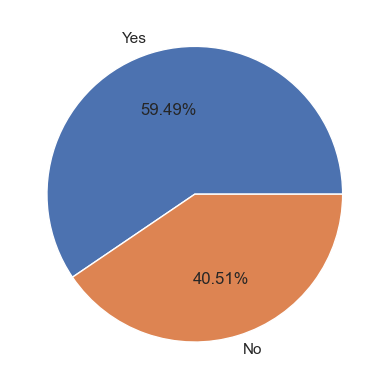

In [78]:
# Online order
online_order_counts = after_dropping_duplicate['online_order'].value_counts()
online_order_fig = plt.pie(online_order_counts,autopct='%1.2f%%', labels=online_order_counts.index)

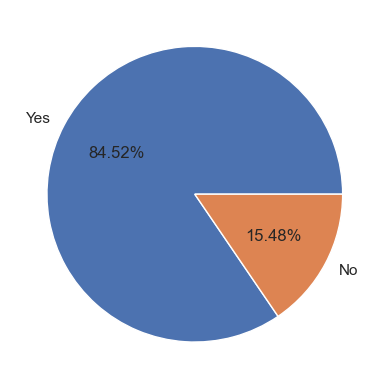

In [79]:
# Table booking 
book_table_counts = after_dropping_duplicate['book_table'].value_counts()
book_table_fig = plt.pie(book_table_counts,autopct='%1.2f%%', labels=online_order_counts.index)

**12. Online order Vs Rate**

<Axes: xlabel='online_order', ylabel='rate'>

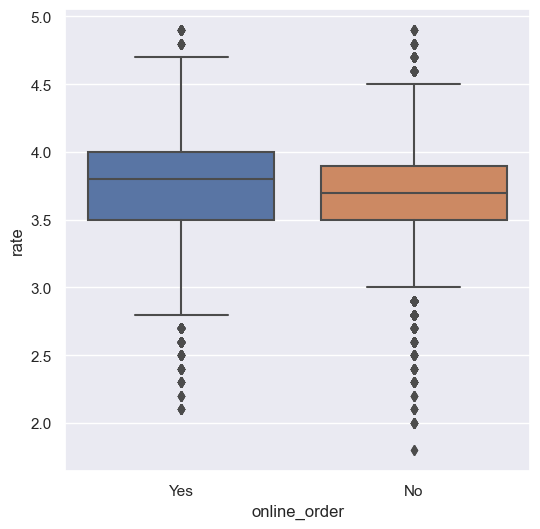

In [80]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = after_dropping_duplicate)

**13.Book table Vs rate**

<Axes: xlabel='book_table', ylabel='rate'>

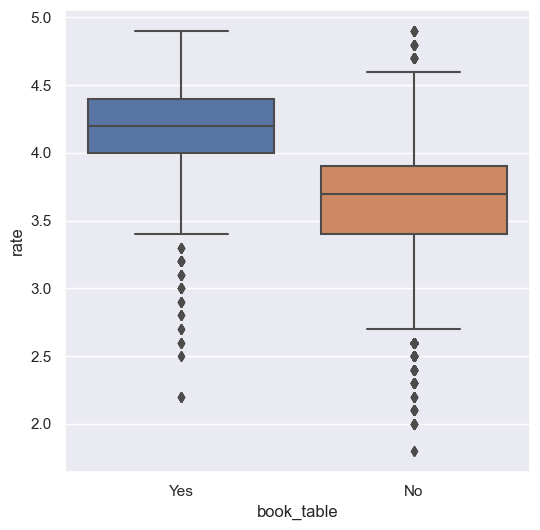

In [81]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'book_table', y = 'rate', data = after_dropping_duplicate)

**14. Location wise votes**

In [82]:
votes = after_dropping_duplicate[['location', 'votes']]
votes.drop_duplicates()
max_votes = votes.groupby(['location'])['votes'].sum()
max_votes = max_votes.to_frame()
max_votes = max_votes.sort_values('votes', ascending=False)
max_votes.head()

,votes
location,
Koramangala 5th Block,1988850
Indiranagar,1150694
Koramangala 4th Block,591404
Church Street,556015
JP Nagar,490826


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93]),
 [Text(0, 0, 'Koramangala 5th Block'),
  Text(1, 0, 'Indiranagar'),
  Text(2, 0, 'Koramangala 4th Block'),
  Text(3, 0, 'Church Street'),
  Text(4, 0, 'JP Nagar'),
  Text(5, 0, 'Whitefield'),
  Text(6, 0, 'Lavelle Road'),
  Text(7, 0, 'HSR'),
  Text(8, 0, 'Marathahalli'),
  Text(9, 0, 'BTM'),
  Text(10, 0, 'Koramangala 7th Block'),
  Text(11, 0, 'Jayanagar'),
  Text(12, 0, 'Sarjapur Road'),
  Text(13, 0, 'Brigade Road'),
  Text(14, 0, 'MG Road'),
  Text(15, 0, 'Koramangala 6th Block'),
  Text(16, 0, 'Residency Road'),
  Text(17, 0, 'Cunningham Road'),
  Text(18, 0, 'S

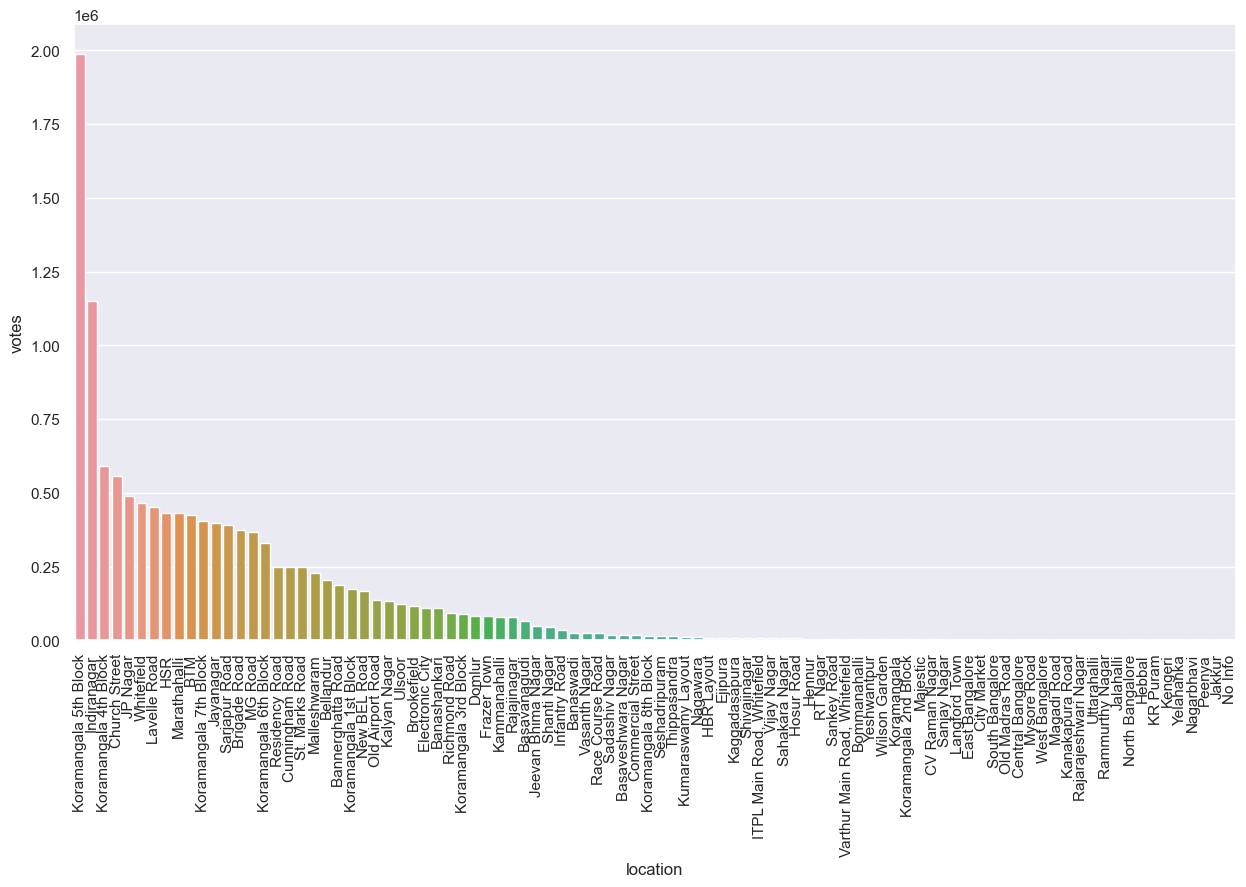

In [96]:
plt.figure(figsize = (15,8))
sns.barplot(x=max_votes.index,y=max_votes['votes'])
plt.xticks(rotation = 90)

**15. Average cost for two**

C:\Users\Neha Koli\AppData\Local\Temp\ipykernel_5796\2247525435.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(after_dropping_duplicate['approx_cost(for two people)'], shade=True)


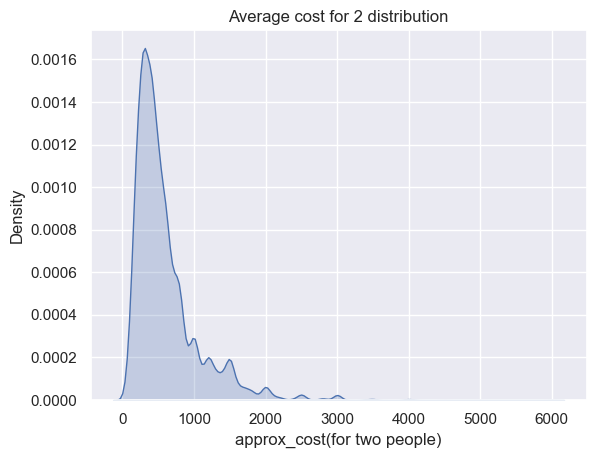

In [84]:
sns.kdeplot(after_dropping_duplicate['approx_cost(for two people)'], shade=True)
plt.title("Average cost for 2 distribution")
plt.show()

**16.Restrarunts at different locations**

In [85]:
after_dropping_duplicate.groupby('location')['name'].unique()

location
BTM                  [Sankranthi Veg Restaurant, Hearts Unlock Cafe...
Banashankari         [Jalsa, Spice Elephant, San Churro Cafe, Addhu...
Banaswadi            [Cafe Nibras, The Sanctuary, Crunch Pizzas, 9 ...
Bannerghatta Road    [Deja Vu Resto Bar, Fattoush, Empire Restauran...
Basavanagudi         [Grand Village, Timepass Dinner, Srinathjis Ca...
                                           ...                        
West Bangalore       [FreshMenu, Fit Dish Fetish, Garden City Mobil...
Whitefield           [Imperio Cafe, Night Diaries, LocalHost, ABs  ...
Wilson Garden        [Tree Top, Sahanas Nati Style, Karavali Kolima...
Yelahanka            [Prashanth Naati Corner, Red Chillies Curries ...
Yeshwantpur          [Chefs Bank, New Agarwal Bhavan, Fishing Boat,...
Name: name, Length: 94, dtype: object

In [86]:
restaurant=[]
location=[]
for key,location_df in after_dropping_duplicate.groupby('location'):
    location.append(key)
    restaurant.append(len(location_df['name'].unique()))

**Locations which have most restrarunts**

In [87]:
loc=pd.DataFrame(zip(location,restaurant))
loc.columns=['location','restaurant']
loc.set_index('location',inplace=True)
loc.sort_values(by='restaurant').tail(10)

,restaurant
location,
Bellandur,348
Jayanagar,352
Bannerghatta Road,448
JP Nagar,502
Indiranagar,524
Marathahalli,656
HSR,683
Electronic City,695
BTM,698


<Axes: xlabel='location'>

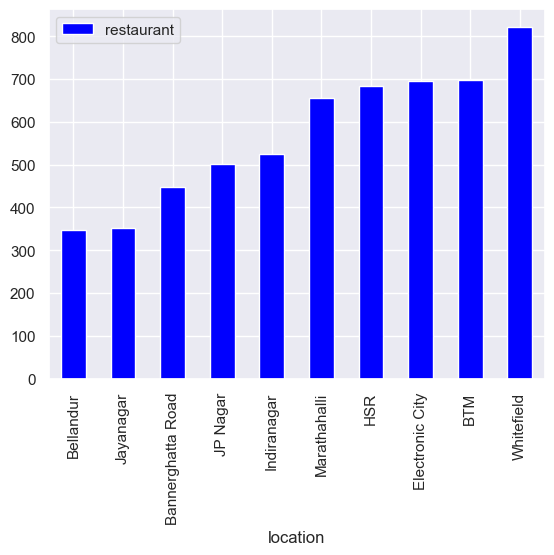

In [88]:
loc.sort_values(by='restaurant').tail(10).plot.bar(color='blue')

**17. locations which have rare restarunts**

In [89]:
loc1=pd.DataFrame(zip(location,restaurant))
loc1.columns=['location','restaurant']
loc1.set_index('location',inplace=True)
loc1.sort_values(by='restaurant').head(10)

,restaurant
location,
Peenya,1
Kengeri,1
Jakkur,1
Rajarajeshwari Nagar,2
Central Bangalore,2
Langford Town,2
West Bangalore,4
Nagarbhavi,4
Yelahanka,4


<Axes: xlabel='location'>

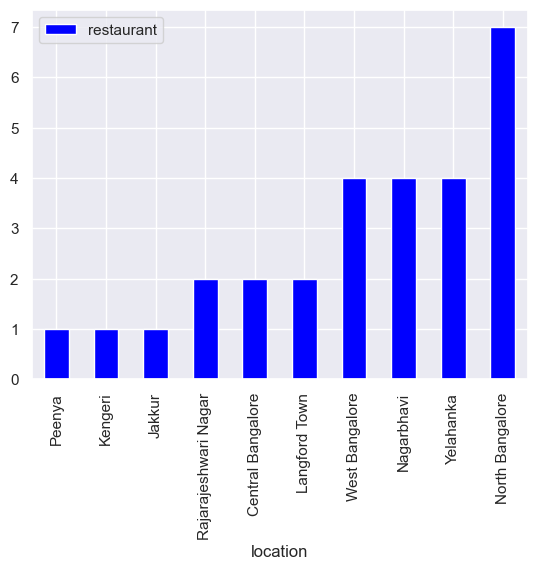

In [90]:
loc1.sort_values(by='restaurant').head(10).plot.bar(color='blue')

**18. Most popular cusins**

Text(0.5, 1.0, 'Most popular cuisines')

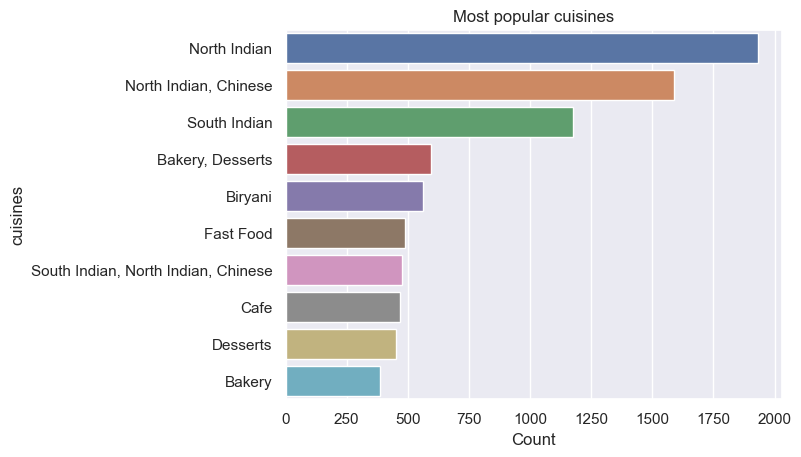

In [97]:
cuisines=after_dropping_duplicate['cuisines'].value_counts()[:10]
sns.barplot(x=cuisines,y=cuisines.index)
plt.xlabel('Count')
plt.title("Most popular cuisines")

C:\Users\Neha Koli\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


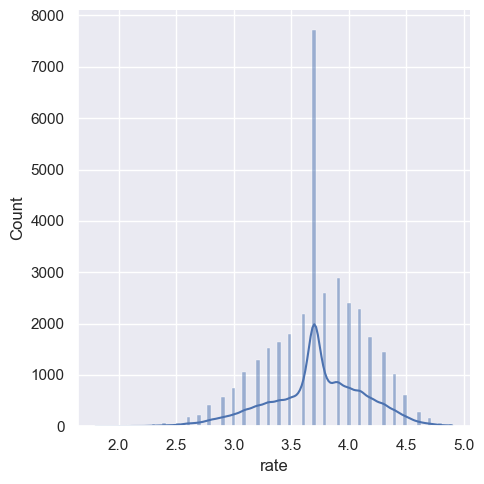

In [92]:
sns.displot(after_dropping_duplicate['rate'],kde=True)

C:\Users\Neha Koli\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


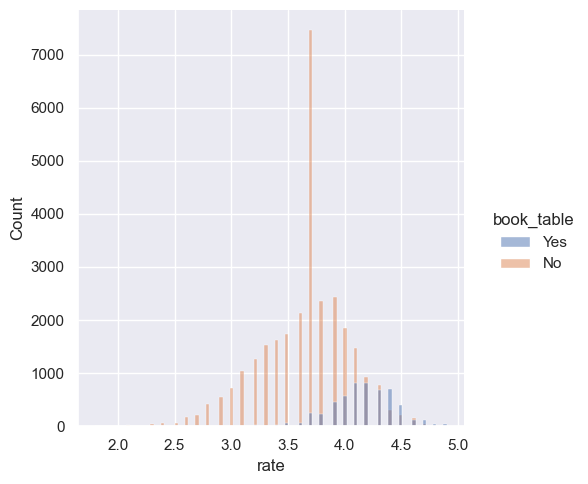

In [93]:
sns.displot(after_dropping_duplicate,x='rate',hue='book_table')

In [94]:
np.random.seed(321)

sample_means = []
# Loop 1000 times to take 1000 means
for i in range(1000):
  # Take sample of size 20 from num_users col of all_deals with replacement
  cur_sample = after_dropping_duplicate['rate'].sample(20,replace = True)
  # mean  
  cur_mean = np.mean(cur_sample)
  # Append cur_mean to sample_means
  sample_means.append(cur_mean)

# Print mean of sample_means
np.mean(sample_means)

3.72655

C:\Users\Neha Koli\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Neha Koli\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Neha Koli\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


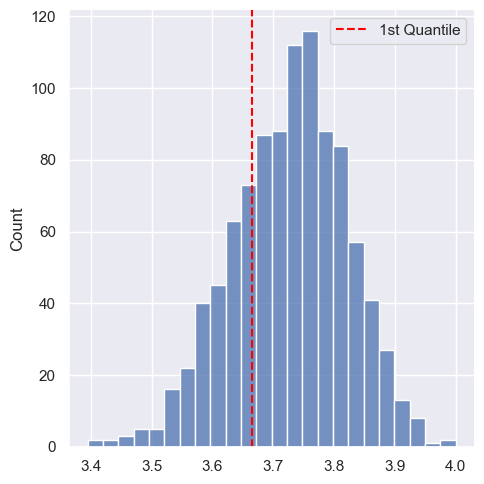

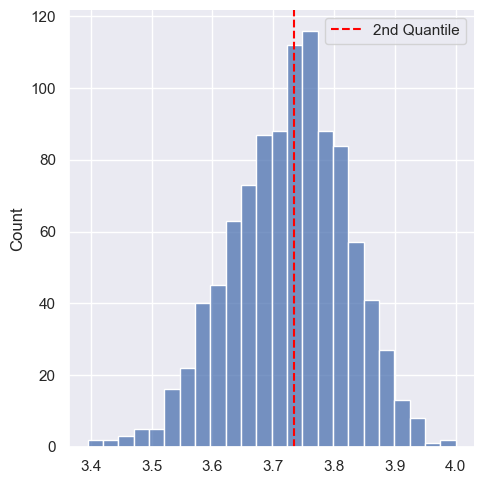

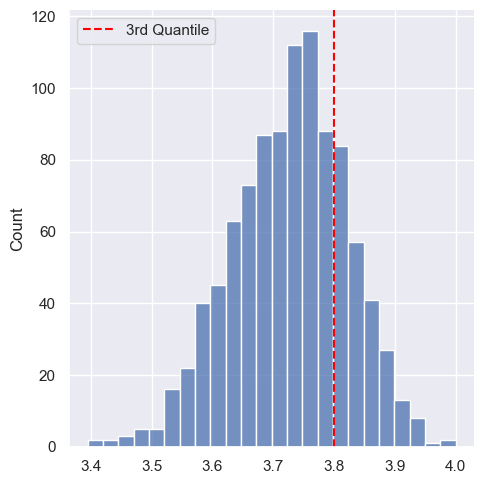

In [98]:
quantiles_zomato = [0.25,0.5,0.78]
lables = ['1st Quantile','2nd Quantile','3rd Quantile']
ab = 0
for i in quantiles_zomato:
    sns.displot(data=sample_means)
    plt.axvline(x=np.quantile(sample_means,i),
            color='red',linestyle='--', label =lables[ab])
    ab += 1
    plt.legend()

plt.show()    
